# Imports and Commands

## Imports

In [207]:
##ALL OF THE IMPORTS AND SUCH

from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import math
import cmath
from numpy import genfromtxt
import colorcet as cc
import random
import aotools
import itertools
from tqdm import tqdm as progress

import numpy as np
from numpy.linalg import eig
import scipy as sp

plt.style.use('dark_background')

## Colourmaps

In [105]:
#Generate Colormap Intensity
cmap = np.zeros([256, 4])
cmap[:, 3] = np.linspace(0, 1, 256)
cmap[:, 0]= np.linspace(0, 0, 256)
cmap[:, 1]= np.linspace(0, 0, 256)
cmap[:, 2]= np.linspace(0, 0, 256)
#Intensity colours
imap = matplotlib.colors.ListedColormap(cmap)
#Phase colours
pmap= cc.m_CET_C6

In [ ]:
#Generate Phase colormap
import pylab as pl
import numpy as np

a = np.array([[0,1]])
pl.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap=pmap)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.1, 1.2, 2])
pl.colorbar(orientation="horizontal", cax=cax, ticks=[])
pl.savefig("colorbar.png")

## Functions

In [550]:
#These are some functions for making beams in the OAM Basis

# Generate mode list for complex superposition beams 
def ell(d):
    if d%2 == 0:
        l=np.linspace(-np.floor(d/2),np.floor(d/2),d+1,dtype=int)
        l=l[l != 0]
    else:
        l=np.linspace(-np.floor(d/2),np.floor(d/2),d,dtype=int)
    return l

#Phases for arbitrary MUBs in prime dimensions
def MUBphases(d,MUB):
    phi,p=[],[]
    for state in range(d):
        for j in range(d):
            p.append(((2*np.pi/d)*(MUB*(j**2)+state*j)))
        phi.append(p)
        p=[]
    return phi

#Mixing large amount of beams in a loop
def MixManyBeams(beams):
    if len(beams) > 1:
        beams[1]=BeamMix(beams[0],beams[1])
        beams.pop(0)
        MixManyBeams(beams)
    return beams[0]

#OAM beams 
def OAM(state: int=0 ,phase=0,amp=1):
    F=Begin(size,wavelength,N)
    F=GaussLaguerre(F, w0, p=0, l=state, A=amp*(1/w0)*np.sqrt(2/(np.pi*(math.factorial(abs(state))))), ecs=0)
    F=SubPhase(F,Phase(F)+phase)
    return F

#Arbitrary ANG mode in dimension d
def ANG(d,state,norm=0):
    intensityNorm=[1,1,187.3568368182197,302.7415771427128,281.4774347094998,342.95046333063704,1,330.2491174614896,276.25225696328897,1,1,1,1,1,1,1,1,1,1,1,1,1]
    Q,p=[],[]
    l=ell(d)
    
    for i in range(d):
        p.append((2*np.pi/d)*i*state)

    for i in range(d):
        Q.append(OAM(l[i],p[i]))

    F=MixManyBeams(Q)

    if norm==1:
        return [F,intensityNorm[d]]
    else:
        return F

#Arbitrary MUB in d dimensions {2,3,4,5,7,8}
def ArbMUB(d,MUB,state,norm=0):
    intensityNorm=[1,1,187.3568368182197,302.7415771427128,281.4774347094998,342.95046333063704,1,330.2491174614896,276.25225696328897,1,1,1,1,1,1,1,1,1,1,1,1,1]
    Q,p=[],[]
    l=ell(d)
    if d==2:
        p=[[[0,0],[0,np.pi]],[[0,np.pi/2],[0,3*np.pi/2]]][MUB][state]
    elif d==4:
        p=[[[0,0,0,0],[0,np.pi,np.pi,0],[0,0,np.pi,np.pi],[0,np.pi,0,np.pi]],[[0,np.pi/2,np.pi/2,np.pi],[0,3*np.pi/2,3*np.pi/2,np.pi],[0,np.pi/2,3*np.pi/2,0],[0,3*np.pi/2,np.pi/2,0]],[[0,0,3*np.pi/2,np.pi/2],[0,np.pi,np.pi/2,np.pi/2],[0,0,np.pi/2,3*np.pi/2],[0,np.pi,3*np.pi/2,3*np.pi/2]],[[0,3*np.pi/2,0,np.pi/2],[0,np.pi/2,np.pi,np.pi/2],[0,np.pi/2,0,3*np.pi/2],[0,3*np.pi/2,np.pi,3*np.pi/2]]][MUB][state]
    elif d==8:
        p=[[[0,0,0,0,0,0,0,0],[0,np.pi/2,np.pi/2,np.pi,np.pi/2,np.pi,np.pi,3*np.pi/2],[0,np.pi/2,0,np.pi/2,0,3*np.pi/2,np.pi,np.pi/2],[0,0,np.pi/2,np.pi/2,np.pi/2,3*np.pi/2,0,np.pi],[0,0,np.pi/2,3*np.pi/2,0,np.pi,np.pi/2,np.pi/2],[0,np.pi/2,0,3*np.pi/2,np.pi/2,0,np.pi/2,np.pi],[0,np.pi/2,np.pi/2,0,0,np.pi/2,3*np.pi/2,np.pi],[0,0,0,np.pi,np.pi/2,np.pi/2,3*np.pi/2,np.pi/2]],[[0,np.pi,0,np.pi,0,np.pi,0,np.pi],[0,3*np.pi/2,np.pi/2,0,np.pi/2,0,np.pi,np.pi/2],[0,3*np.pi/2,0,3*np.pi/2,0,np.pi/2,np.pi,3*np.pi/2],[0,np.pi,np.pi/2,3*np.pi/2,np.pi/2,np.pi/2,0,0],[0,np.pi,np.pi/2,np.pi/2,0,0,np.pi/2,3*np.pi/2],[0,3*np.pi/2,0,np.pi/2,np.pi/2,np.pi,np.pi/2,0],[0,3*np.pi/2,np.pi/2,np.pi,0,3*np.pi/2,3*np.pi/2,0],[0,np.pi,0,0,np.pi/2,3*np.pi/2,3*np.pi/2,3*np.pi/2]],[[0,0,np.pi,np.pi,0,0,np.pi,np.pi],[0,np.pi/2,3*np.pi/2,0,np.pi/2,np.pi,0,np.pi/2],[0,np.pi/2,np.pi,3*np.pi/2,0,3*np.pi/2,0,3*np.pi/2],[0,0,3*np.pi/2,3*np.pi/2,np.pi/2,3*np.pi/2,np.pi,0],[0,0,3*np.pi/2,np.pi/2,0,np.pi,3*np.pi/2,3*np.pi/2],[0,np.pi/2,np.pi,np.pi/2,np.pi/2,0,3*np.pi/2,0],[0,np.pi/2,3*np.pi/2,np.pi,0,np.pi/2,np.pi/2,0],[0,0,np.pi,0,np.pi/2,np.pi/2,np.pi/2,3*np.pi/2]],[[0,np.pi,np.pi,0,0,np.pi,np.pi,0],[0,3*np.pi/2,3*np.pi/2,np.pi,np.pi/2,0,0,3*np.pi/2],[0,3*np.pi/2,np.pi,np.pi/2,0,np.pi/2,0,np.pi/2],[0,np.pi,3*np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi,np.pi],[0,np.pi,3*np.pi/2,3*np.pi/2,0,0,3*np.pi/2,np.pi/2],[0,3*np.pi/2,np.pi,3*np.pi/2,np.pi/2,np.pi,3*np.pi/2,np.pi],[0,3*np.pi/2,3*np.pi/2,0,0,3*np.pi/2,np.pi/2,np.pi],[0,np.pi,np.pi,np.pi,np.pi/2,3*np.pi/2,np.pi/2,np.pi/2]],[[0,0,0,0,np.pi,np.pi,np.pi,np.pi],[0,np.pi/2,np.pi/2,np.pi,3*np.pi/2,0,0,np.pi/2],[0,np.pi/2,0,np.pi/2,np.pi,np.pi/2,0,3*np.pi/2],[0,0,np.pi/2,np.pi/2,3*np.pi/2,np.pi/2,np.pi,0],[0,0,np.pi/2,3*np.pi/2,np.pi,0,3*np.pi/2,3*np.pi/2],[0,np.pi/2,0,3*np.pi/2,3*np.pi/2,np.pi,3*np.pi/2,0],[0,np.pi/2,np.pi/2,0,np.pi,3*np.pi/2,np.pi/2,0],[0,0,0,np.pi,3*np.pi/2,3*np.pi/2,np.pi/2,3*np.pi/2]],[[0,np.pi,0,np.pi,np.pi,0,np.pi,0],[0,3*np.pi/2,np.pi/2,0,3*np.pi/2,np.pi,0,3*np.pi/2],[0,3*np.pi/2,0,3*np.pi/2,np.pi,3*np.pi/2,0,np.pi/2],[0,np.pi,np.pi/2,3*np.pi/2,3*np.pi/2,3*np.pi/2,np.pi,np.pi],[0,np.pi,np.pi/2,np.pi/2,np.pi,np.pi,3*np.pi/2,np.pi/2],[0,3*np.pi/2,0,np.pi/2,3*np.pi/2,0,3*np.pi/2,np.pi],[0,3*np.pi/2,np.pi/2,np.pi,np.pi,np.pi/2,np.pi/2,np.pi],[0,np.pi,0,0,3*np.pi/2,np.pi/2,np.pi/2,np.pi/2]],[[0,0,np.pi,np.pi,np.pi,np.pi,0,0],[0,np.pi/2,3*np.pi/2,0,3*np.pi/2,0,np.pi,3*np.pi/2],[0,np.pi/2,np.pi,3*np.pi/2,np.pi,np.pi/2,np.pi,np.pi/2],[0,0,3*np.pi/2,3*np.pi/2,3*np.pi/2,np.pi/2,0,np.pi],[0,0,3*np.pi/2,np.pi/2,np.pi,0,np.pi/2,np.pi/2],[0,np.pi/2,np.pi,np.pi/2,3*np.pi/2,np.pi,np.pi/2,np.pi],[0,np.pi/2,3*np.pi/2,np.pi,np.pi,3*np.pi/2,3*np.pi/2,np.pi],[0,0,np.pi,0,3*np.pi/2,3*np.pi/2,3*np.pi/2,np.pi/2]],[[0,np.pi,np.pi,0,np.pi,0,0,np.pi],[0,3*np.pi/2,3*np.pi/2,np.pi,3*np.pi/2,np.pi,np.pi,np.pi/2],[0,3*np.pi/2,np.pi,np.pi/2,np.pi,3*np.pi/2,np.pi,3*np.pi/2],[0,np.pi,3*np.pi/2,np.pi/2,3*np.pi/2,3*np.pi/2,0,0],[0,np.pi,3*np.pi/2,3*np.pi/2,np.pi,np.pi,np.pi/2,3*np.pi/2],[0,3*np.pi/2,np.pi,3*np.pi/2,3*np.pi/2,0,np.pi/2,0],[0,3*np.pi/2,3*np.pi/2,0,np.pi,np.pi/2,3*np.pi/2,0],[0,np.pi,np.pi,np.pi,3*np.pi/2,np.pi/2,3*np.pi/2,3*np.pi/2]]][state][MUB]
    else:
        for j in range(d):
            p.append(((2*np.pi/d)*(MUB*(j**2)+state*j)))
            
    for i in range(d):
        Q.append(OAM(l[i],p[i]))
    F=MixManyBeams(Q)

    if norm==1:
        return [F,intensityNorm[d]]
    else:
        return F
    

In [220]:
##These are custom functions for plotting the beams.

#Show a plot of the beam with phase and intensity
def plotbeam(F):
    I=1-Intensity(1,F)
    Phi=np.mod(Phase(F),2*pi)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ax1.imshow(I,cmap=imap,vmin=np.min(I),vmax=np.max(I),interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()

#Show a plot of the intensity distribution of the beam
def plotint(F,norm=1):
    F=Normal(F)
    if norm==1:
        I=Intensity(1,F)
    else:
        I=Intensity(0,F)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(I,cmap='grey',vmin=0,vmax=norm)
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()
    return I

#Show a plot of the phase distribution of the beam
def plotphase(F):
    Phi=np.mod(Phase(F),2*pi)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')

    plt.tight_layout()

#Save a plot of the beam with phase and intensity
def savebeam(F,name='unnamed',norm=1):
    F=Normal(F)
    if norm==1:
        I=1-Intensity(1,F)
    else:
        I=norm-Intensity(0,F)
    Phi=np.mod(Phase(F),2*pi)

    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot()
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ax1.imshow(I,cmap=imap,vmin=0,vmax=norm)
    ax1.axis("off")
        
    plt.savefig(name+'.png', bbox_inches=0)
    plt.close("all")

In [110]:
#These are custom functions to calculate the overlap integral between two modes

# This is the overlap integral to check the fidelity between two modes
def overlapInt(F,G):
    #F,G=Normal(F),Normal(G)
    Ffield,Gfield=np.conjugate(F.field),G.field
    fieldArr=np.multiply(Ffield,Gfield)
    summed=abs(np.sum(fieldArr))**2
    return summed

#Normalizes the overlap integrals for a tomographic measurement in dimension d. 
def normTomography(ints, d):
    return np.concatenate([
        chunk / chunk.sum() if chunk.sum() != 0 else chunk
        for chunk in np.split(ints, range(d, len(ints), d))
    ])
    

In [427]:
#Functions to propogate the beam through a channel

#Propagates one beam through the channel defined by the distance and the list of abberations that is input (abbs)
#If no abberations, distance is the whole channel
#If there are abberations, distance is the distance per abberation
def propChannel(F,distance,abbs=0):
    if not hasattr(abbs, "__len__"):
        F=Fresnel(F,distance)
    else:
        for screen in abbs:
            F=SubPhase(F,Phase(F)+screen)
            F=Fresnel(F,distance)
    return F

In [133]:
#Calculate full crosstalk of two beam lists

def crosstalk(Fs,Gs):
    c,C=[],[]
    for F in Fs:
        c=[]
        for G in Gs:
            c.append(overlapInt(F,G))
        C.append(c/sum(c))
    return C

def tomography(Fs,Gs):
    c,C=[],[]
    for F in Fs:
        c=[]
        for G in Gs:
            c.append(overlapInt(F,G))
        C.append(normTomography(c,math.isqrt(len(Fs))))
    return C

def plotCrosstalk(cross):
    plt.imshow(cross, interpolation='none', cmap='viridis', vmin=0,vmax=1)
    plt.show()

## Constants

In [462]:
#Constants
pi=3.141592653

#Beam Params
size = 60*cm
wavelength = 785*nm
w0=5*cm
N=128
#Propagataion Params
z=100
r0=0.15
scint=0.5
#number of phase screens
n=1

# Code for doing Things

##Testing pixel modes

In [499]:
test=np.empty((int((N/2)**2),int((N/2)**2)))
print(test)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [523]:
F=Begin(size,wavelength,N)
F=SubPhase(F,np.zeros((N,N)))
intenseAll=[]
initBeams=[]
endFields=[]
for j in progress(range(int(128/4),int(3*128/4))):
    for i in range(int(128/4),int(3*128/4)):
        intens=np.zeros((N,N))
        intens[j][i]=1
        intenseAll.append(intens)
        F=SubIntensity(F,intens)
        initBeams.append(F)
        endFields.append(Fresnel(F,z).field[int(128/4):int(3*128/4)][int(128/4):int(3*128/4)])


100%|██████████| 64/64 [00:49<00:00,  1.28it/s]


In [524]:
len(initBeams)

4096

In [525]:
len(endFields)

4096

In [529]:
transferMatrix=np.array(endFields).reshape(4096,int(128/2)**2)

w,v=eig(transferMatrix)

In [569]:
eigModeVec=v

In [570]:
eig1Int=[abs(eigModeVec[0][i]) for i in range(len(eigModeVec[0]))]
eig1Phase=[cmath.phase(eigModeVec[0][i]) for i in range(len(eigModeVec[0]))]

In [571]:
len(eig1Phase)

4096

In [572]:
eigmode1init=[SubPhase(SubIntensity(beam,Intensity(beam)/int**2),Phase(beam)+phase) for beam,int,phase in zip(initBeams,eig1Int,eig1Phase)]

In [573]:
len(eigmode1init)

4096

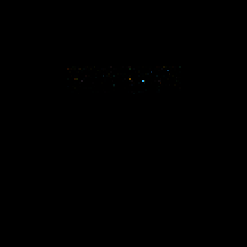

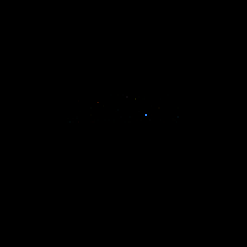

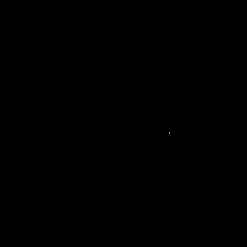

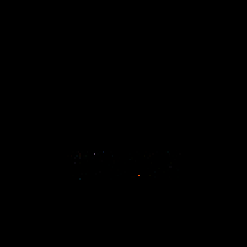

In [574]:
e1=MixManyBeams(eigmode1init[0:1024])
plotbeam(e1)
e2=MixManyBeams(eigmode1init[1025:2048])
plotbeam(e2)
e3=MixManyBeams(eigmode1init[2049:3064])
plotbeam(e3)
e4=MixManyBeams(eigmode1init[3065:4095])
plotbeam(e4)

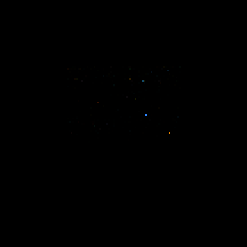

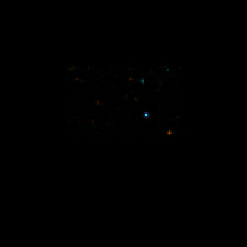

In [575]:
ei1=MixManyBeams([e1,e2,e3,e4])
plotbeam(ei1)
plotbeam(Fresnel(ei1,z))

##Real Work

In [ ]:
d=8
ls=ell(d)
beams=[OAM(l) for l in ls]
beamsProp=[propChannel(F,z) for F in beams]
abbs=[aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,0.001) for i in range(n)]
beamsAbbProp=[propChannel(F,z,abbs) for F in beams]
plotbeam(propChannel(beams[0],z))


In [ ]:
idealCross=crosstalk(beams,beams)
cross=crosstalk(beamsProp,beamsAbbProp)
plotCrosstalk(cross)

In [402]:
eigBeams=[MixManyBeams([OAM(ls[i],cmath.phase(v[j][i]),abs(v[j][i])) for i in range(d)]) for j in range(d)]


In [ ]:
plotCrosstalk(crosstalk(eigBeams,eigBeams))

In [362]:
eigBeams=[MixManyBeams([OAM(ls[i],cmath.phase(v[j][i]),abs(v[j][i])) for i in range(d)]) for j in range(d)]
eigBeamsProp=[propChannel(beam,z) for beam in eigBeams]
eigBeamsabbProp=[propChannel(beam,z,abbs) for beam in eigBeams]
#plotint(propChannel(MixManyBeams([OAM(ls[i],cmath.phase(v[0][i]),abs(v[0][i])) for i in range(d)]),z/n,abbs))

In [ ]:
plotCrosstalk(crosstalk(eigBeams,eigBeams))

In [ ]:
[val for pair in zip(eigBeams,eigBeamsProp) for val in pair]

for beam in progress([val for pair in zip(eigBeams,eigBeamsProp) for val in pair]):
    beam=SubPhase(beam,np.mod(Phase(beam)+np.min(Phase(beam)),2*np.pi))
    plotbeam(beam)

In [ ]:
a = np.array([[0, 2], 
              [2, 3]])
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)

print(np.dot(a,v[1]))
print(w[1]*v[1])

In [ ]:
arr=np.array([[1,0],[0,1]])
vec=np.array([2,3])
print(arr*vec)

In [ ]:
d=4
ls=ell(d)
print(ls)
w0=5*cm
z,n=5000,3
r0=0.3
OAMbeams=[OAM(i) for i in ls]
ANGbeams=[ANG(d,i) for i in range(d)]
ArbMUBbeams=[ArbMUB(d,j,i) for j in range(d) for i in range(d)]
beams=OAMbeams+ArbMUBbeams

beamsProp=[propChannel(F,z/n) for F in beams]
abbs=[aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,0.001) for i in range(n)]
beamsAbbProp=[propChannel(F,z/n,abbs) for F in beams]

p=tomography(beamsProp,beamsAbbProp)

im = plt.imshow(p, interpolation='none', cmap='viridis', vmin=0,vmax=1)
plt.show()


In [ ]:
d=4
ls=ell(d)
print(ls)
w0=5*cm
z,n=5000,3
r0=0.3
OAMbeams=[OAM(i) for i in ls]
ANGbeams=[ANG(d,i) for i in range(d)]
ArbMUBbeams=[ArbMUB(d,j,i) for j in range(d) for i in range(d)]
beams=OAMbeams+ArbMUBbeams

'''abbs=[aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,0.001) for i in range(n)]
beamspropped=[propChannel(F,z/n) for F in beams]
beamsAbbpropped=[propChannel(F,z/n,abbs) for F in beams]'''

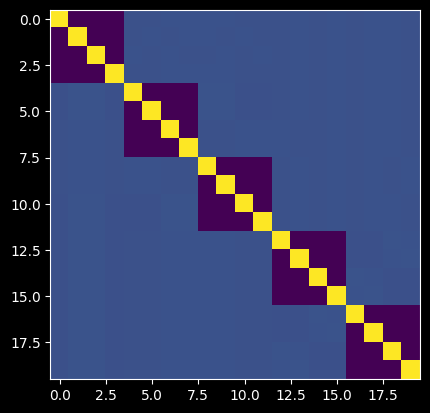

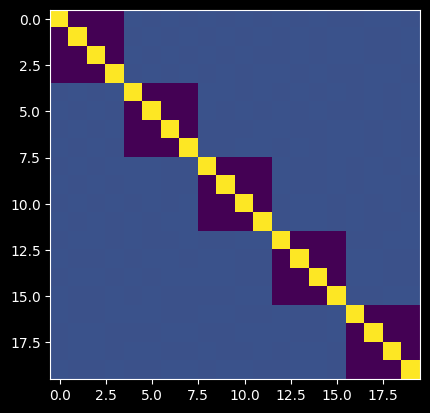

In [438]:
d=4
ls=ell(d)
n=3

OAMbeams=[OAM(i) for i in ls]
ArbMUBbeams=[ArbMUB(d,j,i) for j in range(d) for i in range(d)]

beams=OAMbeams+ArbMUBbeams
beamsProp=[propChannel(F,z/n) for F in beams]



abbs=[aotools.turbulence.phasescreen.ft_sh_phase_screen(10000,N,size/N,100,0.001) for i in range(n)]
singleAbb=np.sum(abbs,axis=0)
beamsAbbProp=[propChannel(F,z/n) for F in beams]
beamsAbb=[SubPhase(F,Phase(F)+singleAbb) for F in beams]

int1,int2=[],[]
for F in beamsAbbProp:
    int1=[]
    for G in beamsProp:
        int1.append(overlapInt(F,G))
    int2.append(normTomography(int1,d))
im = plt.imshow(int2, interpolation='none', cmap='viridis', vmin=0,vmax=1)
plt.show()

int1,int2=[],[]
for F in beamsAbb:
    int1=[]
    for G in beams:
        int1.append(overlapInt(F,G))
    int2.append(normTomography(int1,d))
im = plt.imshow(int2, interpolation='none', cmap='viridis', vmin=0,vmax=1)
plt.show()

In [ ]:
#Plot all abberations and then the final abberation if they were summed

allAbbs=[aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,0.001) for i in range(n)]
singleAbb=np.sum(abbs,axis=0)
allAbbs.append(singleAbb)
for screen in allAbbs:
    im = plt.imshow(np.mod(screen+np.min(screen),2*np.pi), interpolation='none', cmap=pmap,vmax=2*np.pi,vmin=0)
    plt.show()

In [ ]:
#Save figures of all of the OAMs 
N=1024
ls=ell(8)
for i in progress(ls):
            savebeam(OAM(i),'OAM'+str(i))

In [ ]:
#Save figures of all of the ANGs 
N=1024
for dim in progress([2,3,4,5,6,7,8]):
    ls=ell(dim)
    for i in progress(range(dim)):
                savebeam(ANG(dim,i),'ANG'+str(i))

Below here is Attempts to begin doing simulations

In [ ]:
#Constants
pi=3.141592653

#Settings for the Beam

#Let us go with 785 nm for the wavelength
wavelength = 785*nm

# This is the size of the window we are generating, Our reciever is 30 cm diameter so I figured 30 cm is good
size = 30*cm

#This is the beam waist, I do not know if this is radius or if this is diameter, this would be good to check!
#I am suspecting it is radius for some reason?
w0=3*cm

#PropogationDistance
z=5400

#Resolution, keep low for doing rough work, but when we make nice plots we need to crank it up
N = 250

#This will be the average Fried parameter that we want to simulate
r0=0.1
#This will be the "Scintillation index" Sigma_Chi^2 in the textbook I sent over. I don't know what normal values for this are.
scint=0.5

In [ ]:
F=Begin(size,wavelength,N)
F=GaussBeam(F, w0, LG=True, n=0,m=2)

plotbeam(F)

In [ ]:
l=2

F=OAM(l)
plotbeam(F)
F=OAM(-l)
plotbeam(F)
F=BeamMix(OAM(l),OAM(-l))
plotbeam(F)

In [ ]:
#### My understanding is that "Donut" is just the way that the Lightpipes refers to beams with OAM.
F=OAM(0)
plotint(F)
plotphase(F)

In [ ]:
# This is an example of generating a single turbulence screen with the AOtools library.  I do not claim to fully understand what the last two inputs are,
# I am pretty sure I got those values from the internet though and they should be good.

phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,0.001)

In [ ]:
#I don't know if this one, or the next one is better. There is something interesting going on where the boundaries are
# reflective, so in propagation stuff looks funny
beam=OAM(0)
for i in range(10):
    phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(10000,N,size/N,100,0.001)
    beam=SubPhase(beam,Phase(beam)+phase)
    beam=Fresnel(beam,500)
    plotphase(beam)
    plotint(beam)
plotbeam(beam)

In [ ]:
F=OAM(0)
for i in range(n):
    phase=aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,1*mm)

    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(np.mod(phase+np.min(phase),2*pi),cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    print(np.max(Intensity(F)))
    F=SubPhase(F,Phase(F)+phase)
    F=Fresnel(F,z/n)

    plotbeam(F)


